Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introdução a teoria das vibrações

## Trabalho 01 

#### Aluno: Adriano Rodrigues da Silva 
#### Matrícula: 00312130 
#### Professor Doutor Marcelo Maia Rocha


[1.   Introdução](#section_1)  
[2.   Coleta de dados](#section_2)  
[3.   Espectro de Pseudo Aceleração](#section_3)  
[4.   Periodogramas](#section_4)  
[5.   Considerações finais](#section_5)  




## 1. Introdução <a name="section_1"></a> 

Este trabalho tem como objetivo apresentar o comportamento de um sistema com um grau de liberdade (SDOF) submetido a excitação de base. Esta excitação, foi obtida com o auxílio do acelerometro disponivel no aplicativo de celular "INVH" da empresa Bosch. Após a captação de dados de aceleração, foram traçados gráficos de deslocamentos, espectros de pseudo aceleração e deslocamentos, e também, pediodograma de entrada e saída. Para ser possivel o desenvolvimento deste trabalho, realizou-se inicialemnte a importação dos módulos Python apresentados na celula abaixo. 

In [11]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy


## 2. Coleta de dados <a name="section_2"></a> 



Com o uso do acelerometro "iNVH" da empresa Bosch, realizou a medição da aceleração de uma chaleira elétrica em funcionamento. Obteve-se então um arquivo ".csv" com os sinais coletados nos eixos x, y e z. Abaixo, apresentam-se os gráficos relativos à aceleração em função do tempo da medição paras as três direções. 

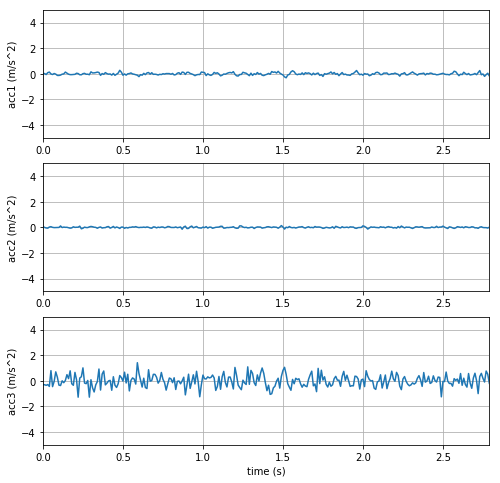

In [12]:
data = MRPy.from_file('data/iNVH001', form='invh').zero_mean()
t    = data.t_axis()

plt.figure(6, figsize=(8, 8), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc)

    plt.xlim(0, data.Td);   
    plt.ylim(-5, 5);
    plt.ylabel('acc{0} (m/s^2)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('time (s)');


Pode ser notado nos gráficos, que apenas a aceleração no eixo vertical Z (acc 3) foi relevante. Sendo assim, caracteriza-se este sistema com apenas um grau de liberdade. Abaixo, pode ser observada novamente a vibração no eixo Z:

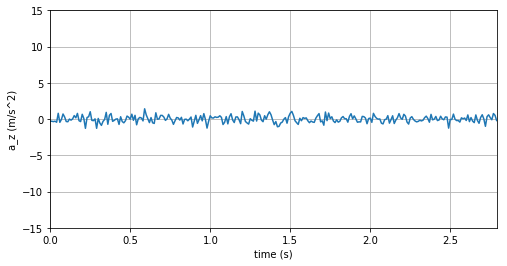

In [13]:
az = MRPy(data[2], data.fs)  
t  = az.t_axis()

plt.figure(7, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
plt.ylim(-15, 15);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True) 


## 3. Espectro de Pseudo Aceleração  <a name="section_3"></a> 


Para a realização desta análise, foram feitas as seguintes determinações:

In [14]:
m  = 1.0       # system mass in kg
fn = np.linspace (0.1,10,1000)       # natural frequency in Hz
zt = 0.05      # damping as ratio of critical
u0 = 0.        # initial displacement
v0 = 0.        # initial velocity
Tn = 1/fn

Utilizando o Método de Duhamel, para solução de equações de equilíbrio para vibrações, foi obtido o deslocamento para cada uma das frquências naturais do sistema. Para cada frequência foi obtida um valor de pico de deslocamento, que foram armazenados em um vetor. A seguir é apresentado o gráfico com deslocamentos máximos em função do período (s). 

aceleração de pico máxima: 0.005992415362725635


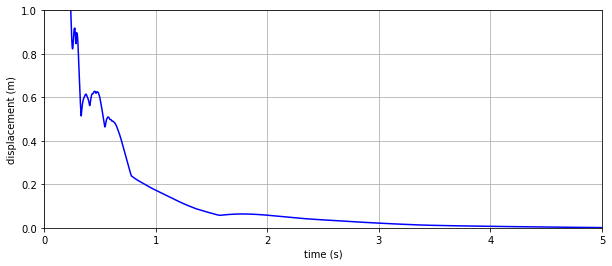

In [15]:
umax = np.zeros(fn.shape)
tn = 1/fn

for k, f in enumerate(fn):
    
    u_Dx= az.sdof_Duhamel(f, zt, u0,v0)/m
    umax[k] = u_Dx.max()
wn = (2*np.pi*fn)
apico = wn*wn*umax


plt.figure(1, figsize=(10, 4), clear=True)
plt.plot(Tn, apico, 'b')
plt.xlim(0, 5);        
plt.xlabel('time (s)') 
plt.ylim(0.000, 1);   
plt.ylabel('displacement (m)') 
plt.grid(True)

print('aceleração de pico máxima:', max(umax))


## 4. Periodogramas <a name="section_4"></a> 

O Periodograma permite estimar a densidade espectral em função da frequência. Neste gráfico, é possivel observar a maior frequência, a qual se aproxima do valor de frequêncial natural de virbação. Abaixo, tem-se a representação do periodrograma de aceleração para a medição realiza. 

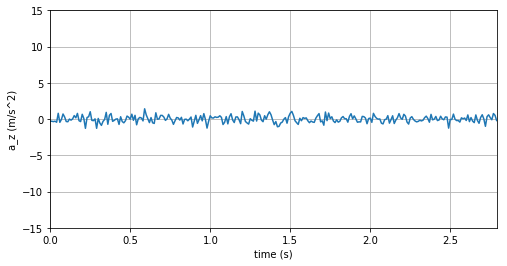

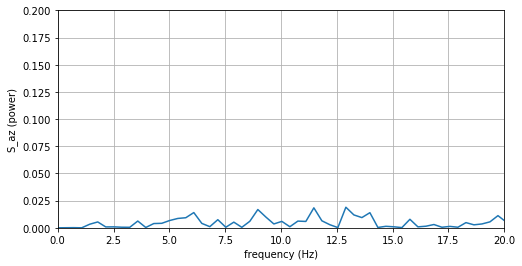

In [16]:
# Reads csv file with accelerometer signal and isolates component a_z

data = MRPy.from_file('data/iNVH001', form='invh').zero_mean()
az   = MRPy(data[2], data.fs)
t    = az.t_axis()

plt.figure(4, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
plt.ylim(-15, 15);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True) 


Saz, fs = az.periodogram()
f       = az.f_axis()

plt.figure(5, figsize=(8, 4), clear=True)
plt.plot(f, Saz[0])

plt.xlim(0, 20);   plt.xlabel('frequency (Hz)') 
plt.ylim(0, 0.2);   plt.ylabel('S_az (power)') 

plt.grid(True)


Na sequência, tem-se o periodograma dos dados de saída: 

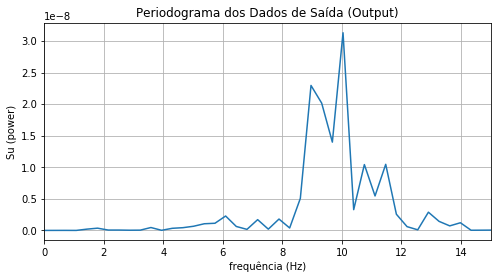

In [17]:
# aplicando o método para cálculo e visualização do periodograma output

Su_Dx, fs = u_Dx.periodogram()
f       = u_Dx.f_axis()

plt.figure(6, figsize=(8, 4), clear=True)
plt.title('Periodograma dos Dados de Saída (Output)')
plt.plot(f, Su_Dx[0])

plt.xlim(0, 15);    
plt.xlabel('frequência (Hz)')
plt.ylabel('Su (power)') 

plt.grid(True)

## 5. Considerações Finais <a name="section_5"></a> 

Com os dados obtidos pelo aplicativo "iNVH" da bosch, apenas a vibração no diração vertical foram consideradas, podendo definir o sistema como apenas 1 grau de liberdade. A partir disso, foi apresentado os gráficos de Espectro Aceleração e Períodograma que ajudam a melhor entender o comportamento e a amplitude da virbração medida. A realização deste trabalho proporcionou o melhor entendimentos de alguns conceitos vistos na matéria de Introdução a Teoria das Vibrações.